#Machine Learning Basics with Linear Regression
In this lab, we will work on basic concepts of machine learning, as reviewed in previous lessons. For that purpose, we will base on one of the simplest machine learning systems: linear regression.

Here are the libraries we will need for this lab:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# To use linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# To compute polynomial features
from sklearn.preprocessing import PolynomialFeatures
# To create train-test splits
from sklearn.model_selection import train_test_split

##Data-generating process
For this example, we will use a nonlinear function to generate the samples of our dataset. Specifically, we will use the function $y=x^3$. Remember that in machine learning, we will not know the underlying probability distribution of the datasets $p_{data}$. Here, we fix it to a known function, just to understand the basic concepts of machine learning.

The idea is to generate 10 samples between -50 and 50 sampling a uniform distribution. Those values will be our feature vector $x \in \mathbb{R}$. The label assigned to each example $x_i$ will be calculated by the function $y_i = x_i^3$.

Before anything else, to make sure our experiments are reproducible, we have to set the random seed to a fixed value:

In [2]:
import random

seed = 42
np.random.seed(seed)
#random.seed(seed)

In [3]:
x = np.random.uniform(-50, 50, size=10)
y = np.power(x, 3)
print(x.shape)
print(y.shape)

(10,)
(10,)


Now the dataset is created, we have to split it into two sets: the training set and the test set. In this case, we will use scikit-learn to create them, using the 30% of the dataset to test.

**EXERCISE:** generate `X_train`, `X_test`, `y_train` and `y_test` using the scikit-learn function `train_test_split()`. Use 30% of the examples of test. Remember to fix the `random_state` parameter with the `seed` value.

In [4]:
# Train and test splits
### WRITE YOUR CODE HERE ### (≈ 1 line)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
########################

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (7,)
X_test shape (3,)
y_train shape (7,)
y_test shape (3,)


Here you have some code to visualize our dataset. Take into account that this is only possible because we are using a toy example of two dimensions $(x, y)$.

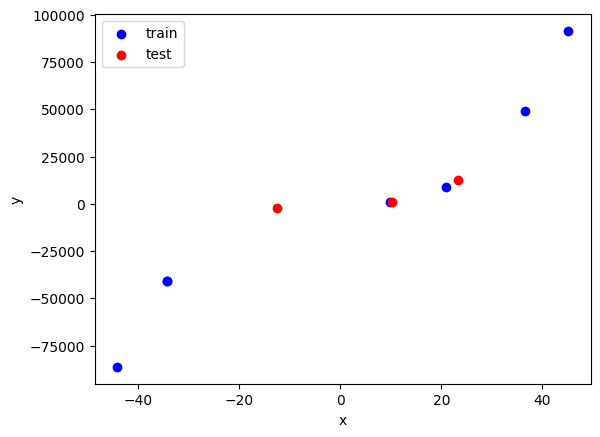

In [5]:
# Plot the training and test data
plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_test, y_test, color='red', label='test')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc="upper left")
plt.show()

As expected, we have three examples int the test set (red spots) and seven in the training set (blue spots).

##Linear Regression
Even though our dataset is not linear at all, we will see how a linear regression performs. First of all, we have to reformat our data to the shape expected by the linear regression model of scikit-learn. Here you have the code. Pay attention to the new shape of `X_train` and `X_test`.

In [6]:
# Expand dims for X_train and X_test
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

print(f'train data: {X_train.shape}, {y_train.shape}')
print(f'test data: {X_test.shape}, {y_test.shape}')

train data: (7, 1), (7,)
test data: (3, 1), (3,)


We will learn a linear regressor using train data and see its performance in the test set using the MSE metric.

**EXERCISE**: learn a linear regression using scikit-learn and predict $y$ values for `X_test`.

In [7]:
### WRITE YOUR CODE HERE ### (≈ 3 lines)
# Set the random seed
np.random.seed(42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

########################

print(f'MSE in test: {mean_squared_error(y_test, y_pred)}')

MSE in test: 329776510.9705825


The MSE we obtain is a high value, indeed, which indicates that our model is performing poorly in the test set. This was expected, since the underlying dataset-generating function is not linear.

In any case, let's see the test set (red spots) and the model we have learned (the black line).

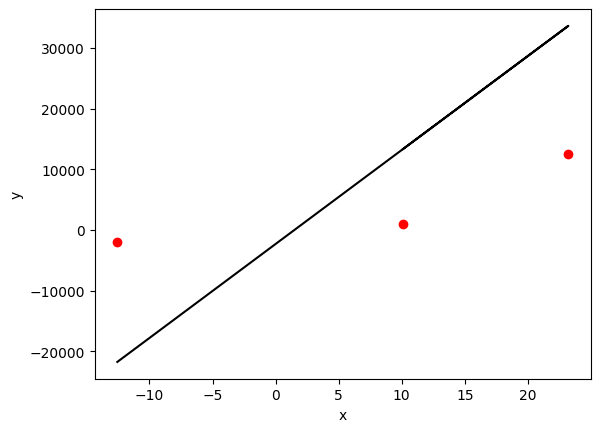

In [8]:
plt.scatter(X_test, y_test, color='red')
#plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

It is interesting to see what happens in the training set too. For that purpose, we need the predictions of our model for the training examples.

**EXERCISE:** use the linear regression learned before to predict the values for `X_train`. Store those values in the variable `y_pred_train`.

In [9]:
### WRITE YOUR CODE HERE ### (≈ 1 line)
y_pred_train = model.predict(X_train)
########################

Now we will visualize the training set (blue spots) with the model we have learned (the black line).

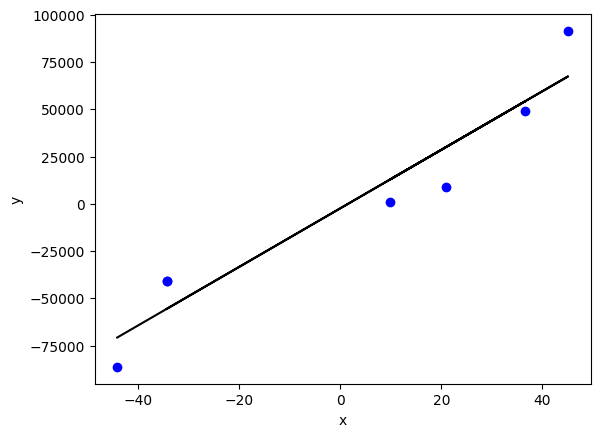

In [10]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred_train, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

We have a problem of **high bias**, because using linear regression we are restricting our hypothesis space to linear functions. This causes **underfitting**, i.e. our model is not even able to properly fit the training set. This suggests we should increase the capacity of our model.

##Polynomial Regression
The natural way to increase the capacity of a linear regression model, is to use polynomial features. For that purpose, scikit-learn offers the `PolynomialFeatures` class, which you will use now.

**EXERCISE:** Use the scikit-learn class `PolynomialFeatures` to compute polynomial features of degree 9 of `X_train` and `X_test` (store the instance of the class in the `trans` variable). Store the new features in the new variables `X_train_d9` and `X_test_d9` respectively.

In [11]:
degree = 9

### WRITE YOUR CODE HERE ### (≈ 3 lines)
# trans = ...

trans = PolynomialFeatures(degree= degree, include_bias=True)
X_train_d9 = trans.fit_transform(X_train)
X_test_d9 = trans.fit_transform(X_test)
########################

print(f'X_train_d9 shape: {X_train_d9.shape}')
print(f'X_test_d9 shape: {X_test_d9.shape}')

X_train_d9 shape: (7, 10)
X_test_d9 shape: (3, 10)


As can be seen, we get 10 features per example: the first one corresponds to $x^0 = 1$, since argument `include_bias` is `True` by default. Afterwards we have the features $x^1$ to $x^9$. If we print the first example:

In [12]:
X_train_d9[0]

array([ 1.00000000e+00, -4.41916388e+01,  1.95290094e+03, -8.63018928e+04,
        3.81382207e+06, -1.68539048e+08,  7.44801671e+09, -3.29140064e+11,
        1.45452388e+13, -6.42777940e+14])

We can see the values of those features. Notice that the first one is 1, which corresponds to the bias term of our linear regression ($x^0$).

Now you have to learn a new linear regression over the new polynomial features. Notice that even though we are using polynomial features as input, our model is still linear: $y = \omega_0 x^0 + \omega_1 x^1 + \omega_2 x^2 + \ldots + \omega_9 x^9$. When we use only one feature, our model learns a line in a two-dimensional space. When we are using 10 features, as in this case, the model will learn a hyper-plane in a space of 11 dimensions.

**EXERCISE:** Learn a linear regression over `X_train_d9` (use the `reg` variable to store the model). Measure the MSE in train and test.

In [13]:
### WRITE YOUR CODE HERE ### (≈ 5 lines)
reg = linear_model.LinearRegression()
reg.fit(X_train_d9, y_train)
y_train_pred = reg.predict(X_train_d9)
y_pred = reg.predict(X_test_d9)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred)

########################

print(f'train mse: {train_mse}')
print(f'test mse: {test_mse}')

train mse: 1.4788213224513066e-16
test mse: 1759866.882205838


We will visualize train and test data with the learned model, which is no longer a line respect to $x$. However, remember that it is still linear in the high-dimensional space. Here we have the code:

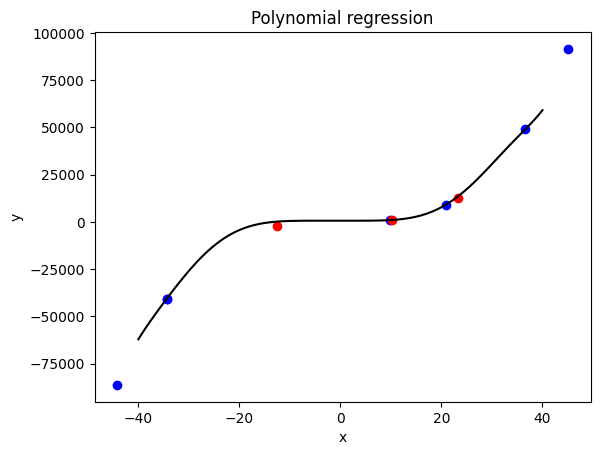

In [14]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')

x_plot = np.linspace(-40, 40, 100)
# NOTE: this trans object should be the one instantiated 3 cells before
x_plot_d9 = trans.fit_transform(np.expand_dims(x_plot, axis=1))
# NOTE: this reg model should be the one learned in the cell before
y_plot = reg.predict(x_plot_d9)
plt.plot(x_plot, y_plot, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial regression')
plt.show()

Looking at those graphs, it is quite obvious that our model has not learned the *shape* of the function $y = x^3$. This should be also expected, because we are using a 9-degree polynomial model to fit a 3-degree polynomial function. Our model has a problem of **over-capacity**, which results in **overfitting**.

##Capacity, Overfitting and Underfitting
We can control the capacity of our linear regression model using the degree of the polynomial features, i.e. the **representational capacity** of the model increases with the degree of the features. To see how learning curves vary depending on the capacity, we will learn and evaluate different linear regression models.

**EXERCISE:** program a loop to learn several linear regression models with polynomial degrees ranging from 1 to 9. Store the train MSE in the list `train_error` and the test MSE in the list `test_error`.

In [17]:
degree = range(1, 9)
train_error = []
test_error = []

### WRITE YOUR CODE HERE ### (≈ 10 lines)

for i in degree:
  trans = PolynomialFeatures(degree= i, include_bias=True)
  X_train_d9 = trans.fit_transform(X_train)
  X_test_d9 = trans.fit_transform(X_test)
  reg = linear_model.LinearRegression()
  reg.fit(X_train_d9, y_train)
  y_train_pred = reg.predict(X_train_d9)
  y_pred = reg.predict(X_test_d9)

  train_error.append(mean_squared_error(y_train, y_train_pred))
  test_error.append(mean_squared_error(y_test, y_pred))

########################

print(f'train errors: {train_error}')
print(f'test errors: {test_error}')

train errors: [267608406.21418768, 205671287.5584891, 1.8011433169724126e-21, 1.3480237478964618e-20, 5.644325994085052e-21, 1.0687173514185118e-20, 8.075143020935073e-18, 1.988713955574804e-14]
test errors: [329776510.9705825, 411708914.95588297, 4.875023405940125e-22, 2.338544712556921e-20, 1.8358532679649038e-20, 1.9093183535053144e-15, 0.0004957771139710453, 0.17753163362201163]


Here you have the code to visualize the training curves. We use blue for train error and red for test error, as usual.

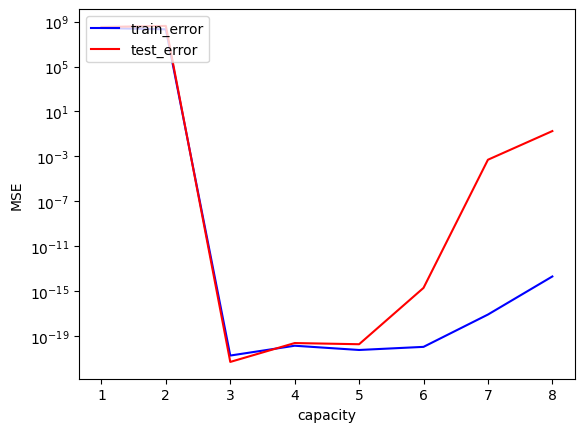

In [18]:
plt.plot(list(degree), train_error, color='blue', label='train_error')
plt.plot(list(degree), test_error, color='red', label='test_error')
plt.legend(loc="upper left")

plt.xlabel('capacity')
plt.ylabel('MSE')
plt.yscale('log')

plt.show()

Given that MSE values vary from very low values to very high ones, we are using a logarithmic scale in the MSE axis. Those learning curves reveal that both training and test error decrease from 1 to 3-degree polynomials. The best error is achieved for 3-degree polynomic features. This makes total sense, as the underlying function is $y = x^3$. As the capacity increases from 3-degree on, training error and test error increase. However, test error increases much more, showing the typical overfitting behaviour.

##Regularization and validation sets
So far, we see that the optimal capacity for our model is a 3-degree polynomial. However, we are not being honest for two reasons:

1.   We do know the underlying function to generate the dataset, which will not be the case in real problems.
2.   We are using test data to tune our machine learning model, which is **absolutely forbidden**.

The usual approach in real problems is different. We will usually follow those steps:


1.   Split the training set to extract a validation or development set.
2.   Minimize the train error, i.e. use the lowest capacity of the model which performs well in the training set.
3.   Regularize our model, selecting the regularization scheme that minimizes the validation error.
4.   Measure the error of the developed model in the test set to estimate the generalization error.

In this case, we will simulate the typical case where an over-capacited model is the one that performs best in train, but has overfitting problems.

###Validation set
Our dataset so far is very small (only 10 examples) and *clean* (it perfectly fits a polynomial function). To extract a meaningful validation set and to see better the effects of regularization, we will build a more realistic dataset, adding more examples and introducing some Gaussian noise.

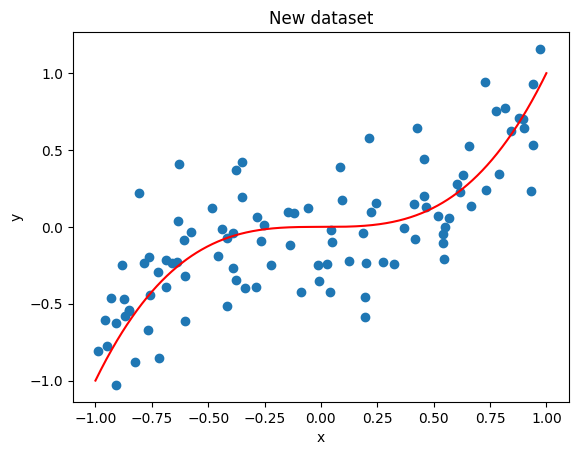

In [19]:
def f(x):
  return np.power(x, 3)

np.random.seed(seed) # just in case

# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(-1, 1, size=n_samples)[:, np.newaxis] # NOTE: we already create the data with the suitable format for scikit-learn
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

# To visualize, we will draw the x^3 function also
x_plot = np.linspace(-1, 1, 1000)
plt.plot(x_plot, np.power(x_plot, 3), color='red')
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('New dataset')
plt.show()


As can be seen, our new dataset is also generated using $y = x^3$ as the underlying function (red line), but adding the Gaussian noise, we make the dataset more challenging.

Now we will create the splits. First, separate train and test, using 80% and 20% of the examples respectively. Afterwards, we will use 20% of the examples in train, to create our validation set.

**EXERCISE:** create the train, validation and test sets and store them in the variables `X_train`, `X_val`, `X_test`, `y_train`, `y_val` and `y_test`.

In [42]:
# Train and test splits
### WRITE YOUR CODE HERE ### (≈ 2 lines)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
########################

print(f'X_train shape {X_train.shape}') # Expected (64, 1)
print(f'X_val shape {X_val.shape}') # Expected (16, 1)
print(f'X_test shape {X_test.shape}') # Expected (20, 1)
print(f'y_train shape {y_train.shape}') # Expected (64, 1)
print(f'y_val shape {y_val.shape}') # Expected (16, 1)
print(f'y_test shape {y_test.shape}') # Expected (20, 1)

X_train shape (64, 1)
X_val shape (16, 1)
X_test shape (20, 1)
y_train shape (64, 1)
y_val shape (16, 1)
y_test shape (20, 1)


Here we have some code to visualize the entire dataset and the created splits: train (blue), val (orange) and test (red).

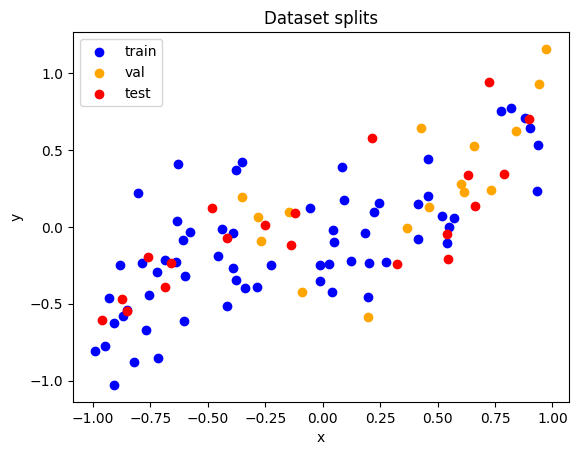

In [43]:
# Plot the training and test data
plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_val, y_val, color='orange', label='val')
plt.scatter(X_test, y_test, color='red', label='test')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset splits')

plt.legend(loc="upper left")
plt.show()

###Linear regression with regularization
Now is the moment to train a linear regressor. We will use again a 9-degree polynomial regression. However, we will not use the scikit-learn class `linear_model.LinearRegression` because it does not offer the means to include weight decay regularization. So go to the web page of scikit-learn and find the suitable model for this task.

**EXERCISE:** train the suitable scikit-learn model for the 9-degree polynomial regression, using $\lambda = 0$ for weight decay, i.e. without any weight decay. Notice that this should be totally equivalent to using `linear_model.LinearRegression`.

In [44]:
degree = 9

### WRITE YOUR CODE HERE ### (≈ 9 lines)
trans = PolynomialFeatures(degree= i, include_bias=True)
X_train_d9 = trans.fit_transform(X_train)
X_val_d9 = trans.fit_transform(X_val)

ridge = linear_model.Ridge(alpha=0.0)
ridge.fit(X_train_d9, y_train)
y_train_pred = ridge.predict(X_train_d9)
y_val_pred = ridge.predict(X_val_d9)

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)

########################

print(f'Train error {train_error}; val error {val_error}')

Train error 0.06530613790336415; val error 0.20134551561610659


You should obtain a train error of around 0.065 and a validation error of around 0.2035. The gap between both of them indicate overfitting. Let's visualize the training and validation sets with the learned model:

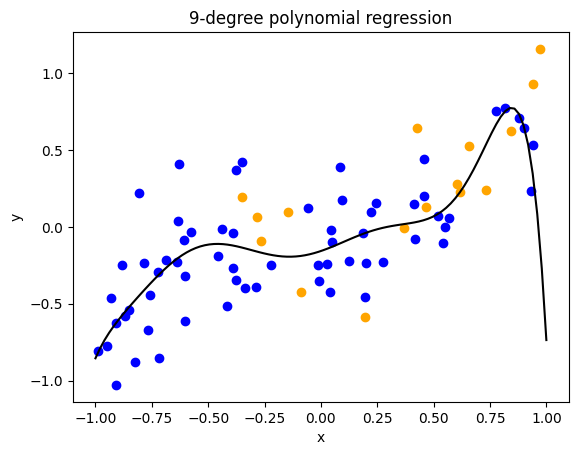

In [45]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_val, y_val, color='orange')

x_plot = np.linspace(-1.0, 1.0, 100)
x_plot_d9 = trans.fit_transform(np.expand_dims(x_plot, axis=1))
y_plot = ridge.predict(x_plot_d9)

plt.plot(x_plot, y_plot, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('9-degree polynomial regression')

plt.show()

As can be seen, our model performs quite well for $x \in (-1.0, 0.75)$, but it could not learn a good pattern in the data to generalize to new cases, specially for $x > 0.75$. Yes, we have overfitting.

What should we do? Regularize the model using the validation set to find the optimum value of $\lambda$.

**EXERCISE:** write a loop to train a 9-degree polynomial regression with different values of $\lambda$. More concretely, use values between 0 and 1 with a step size of 0.1 (the values would be 0, 0.1, 0.2, 0.3, ..., 1). Store train and val errors in the variables `train_error` and `val_error`.

In [46]:
degree = 9
train_error = []
val_error = []

alphas = np.linspace(0, 1, 11) # Generate the regularization values (lambda values)

### WRITE YOUR CODE HERE ### (≈ 11 lines)

trans = PolynomialFeatures(degree= degree, include_bias=True)
X_train_d9 = trans.fit_transform(X_train)
X_val_d9 = trans.fit_transform(X_val)

for a in alphas:
  ridge = linear_model.Ridge(alpha=a)
  ridge.fit(X_train_d9, y_train)
  y_train_pred = ridge.predict(X_train_d9)
  y_val_pred = ridge.predict(X_val_d9)

  train_error.append(mean_squared_error(y_train, y_train_pred))
  val_error.append(mean_squared_error(y_val, y_val_pred))


########################

print(f'train error: {train_error}')
print(f'val error: {val_error}')


train error: [0.06530462327318477, 0.06868616182899691, 0.0696942505741412, 0.07037896073120127, 0.07088021485529503, 0.0712677466933754, 0.07157972023093359, 0.0718387342260089, 0.07205907270078138, 0.07225025019171136, 0.07241887698889597]
val error: [0.20352086758712643, 0.09994542446243582, 0.09345339497873086, 0.0908975040225646, 0.08968316805379387, 0.08908538583012376, 0.08881887544849956, 0.08874880512288058, 0.08880347395003206, 0.08894144804012488, 0.08913725010491207]


Let's look at the learning curves we obtain for different values of $\lambda$.

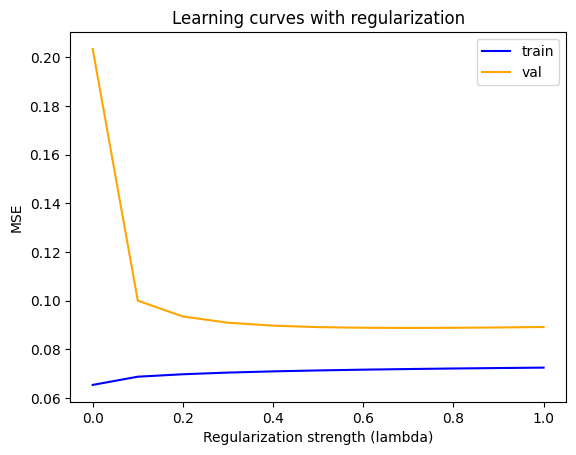

In [47]:
plt.plot(alphas, train_error, color='blue', label='train')
plt.plot(alphas, val_error, color='orange', label='val')

plt.xlabel('Regularization strength (lambda)')
plt.ylabel('MSE')
plt.title('Learning curves with regularization')
plt.legend(loc="upper right")

plt.show()

Well, this graph is very interesting. We can see how even small regularization makes a big difference in the performance of the validation set. $\lambda=0.1$ decreases the MSE from ~0.2 to 0.1. As we increase the value of $\lambda$, the validation error keeps improving steadily. On the other hand, as expected, training error increases as regularization is stronger. But the differences in train are not very important.

Let's see which value of $\lambda$ achieves the best validation error:

In [48]:
best_index = np.argmin(val_error)
lowest_error = val_error[best_index]
print(f'Best lambda: {alphas[best_index]:.1f}; MSE achieved: {lowest_error} ')

Best lambda: 0.7; MSE achieved: 0.08874880512288058 


So this is our final model. We have learned the model in train and tune its regularization hyperparameter in validation. Now we have to measure the generalization error in the test set.

**EXERCISE:** train a 9-degree polynomial regression with the best value of $\lambda$ and measure its MSE in the test set.

In [49]:
degree = 9

### WRITE YOUR CODE HERE ### (≈ 7 lines)
landa = 0.7

trans = PolynomialFeatures(degree= degree, include_bias=True)
X_train_d9 = trans.fit_transform(X_train)
X_test_d9 = trans.fit_transform(X_test)

ridge = linear_model.Ridge(alpha=landa)
ridge.fit(X_train_d9, y_train)
y_pred = ridge.predict(X_test_d9)

test_error = mean_squared_error(y_test, y_pred)

########################
print(f'The test error: {test_error}')

The test error: 0.0631548751266267


You should obtain a test error of ~0.063, which is pretty low given the noise we introduced in the dataset. We will visualize the learned model with our complete dataset (distinguishing different splits), to have an idea of what kind of function we have learned with a regularized 9-degree polynomial regression:

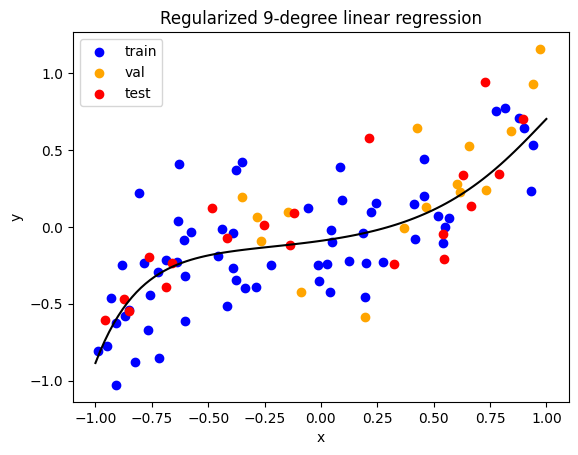

In [50]:
X_train_d = trans.fit_transform(X_train)

y_pred_train = ridge.predict(X_train_d)

plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_val, y_val, color='orange', label='val')
plt.scatter(X_test, y_test, color='red', label='test')

x_plot = np.linspace(-1.0, 1.0, 100)
x_plot_d9 = trans.fit_transform(np.expand_dims(x_plot, axis=1))
y_plot = ridge.predict(x_plot_d9)
plt.plot(x_plot, y_plot, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regularized 9-degree linear regression')
plt.legend(loc='upper left')

plt.show()

Wow! The black line depicted, which is the function learned by the linear regression model, is visually very similar to $y = x^3$. As you can see, regularizing high capacity models works.